# Анализ оттока клиентов

**Цель проекта:**
вследствие того, что банку выгоднее удерживать старых клиентов, чем привлекать новых, необходимо проанализировать клиентов  банка и выделить сегменты клиентов, которые склонны уходить. Далее в отношении каждого сегмента необходимо сформулировать рекоммендации для отдела маркетинга, которые помогут вернуть клиентов или удержать сомневающихся от оттока.

**Задачи проекта:**

1. Загрузка данных *bank_scrooge.csv* и вывод общей информации;

2. Предобработка данных:
- приведение названий столбцов к стилю, удобному для дальнейшего анализа данных;

- поиск и обработка пропусков в датасете;

- поиск и обработка явных и неявных дубликатов;

- приведение данных столбцов к коректному типу;

- кодирование *(в рамках курса с этим не сталкивалась, прошу какую-либо информацию, как это делать)*;

3. Исследовательский анализ данных:
- сделать общий анализ данных (какие города представлены в данных, какой средний возраст у клиентов банка, средний доход и т.д.);

- изучить распределение параметров в разрезе оттока;

- провести сравнение распределения параметров для оставшихся клиентов, и для тех, что ушли, составление портретов данных категорий клиентов;

- провести корреляционный анализ признака оттока с другими признаками;

- сделать промежуточные выводы каждого шага в ходе исследовательского анализа;

4. Статистический анализ данных:
- проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались (выбрать тест и обосновать его применимость);

- аналогичным образом проверить вторую гипотезу, которая будет сформулированна в ходе выполнения проекта;

- сделать выводы по полученным результатам теста;

5. Сделать общий вывод по проведенному исследовательскому и статистическому анализу данных;

6. Сегментация клиентов:
- разделение клинтов, как минимум, на три группы по признакам, выявленным в исследовательском анализе;

7. Приоритизация сегментов:
- обозначить группы с наивысшим риском, на котрые в первую очередь нужно обратить внимание;

8. Формирование персональных рекоммендаций для каждого сегмента.

## Загрузка данных и вывод общей информации

In [1]:
!pip install phik

     |████████████████████████████████| 686 kB 2.1 MB/s eta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns
import scipy.stats as st
import phik

In [3]:
data = pd.read_csv('/datasets/bank_scrooge.csv')

In [4]:
data.head()

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

Общая информация:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Статистические данные: 

In [6]:
data.describe()

USERID         score          age        equity       balance  \
count   10000.00000  10000.000000  9974.000000  10000.000000  7.705000e+03   
mean   171814.71260    848.699400    42.734409      2.627600  8.277943e+05   
std     33708.23812     65.448519    12.179971      1.980836  1.980614e+06   
min     94561.00000    642.000000    18.000000      0.000000  0.000000e+00   
25%    142810.25000    802.000000    33.000000      0.000000  2.955542e+05   
50%    172728.00000    853.000000    40.000000      3.000000  5.242722e+05   
75%    201261.75000    900.000000    51.000000      4.000000  9.807058e+05   
max    229145.00000   1000.000000    86.000000      9.000000  1.191136e+08   

           products   credit_card  last_activity    EST_SALARY         churn  
count  10000.000000  10000.000000   10000.000000  1.000000e+04  10000.000000  
mean       1.870100      0.680400       0.523500  1.478669e+05      0.182000  
std        0.792647      0.466345       0.499472  1.393885e+05      0.385864  
min        0.000000      0.000000       0.000000  2.546300e+03      0.000000  
25%        1.000000      0.000000       0.000000  7.525190e+04      0.000000  
50%        2.000000      1.000000       1.000000  1.196581e+05      0.000000  
75%        2.000000      1.000000       1.000000  1.745005e+05      0.000000  
max        5.000000      1.000000       1.000000  1.395064e+06      1.000000

Фрейм с данными содержит 10000 строк и 12 столбцов:

- USERID — идентификатор пользователя;
- score — баллы кредитного скоринга;
- city — город;
- gender — пол;
- age — возраст;
- equity — количество баллов собственности;
- balance — баланс на счёте;
- products — количество продуктов, которыми пользуется клиент;
- credit_card — есть ли кредитная карта;
- last_activity — активный клиент;
- EST_SALARY — оценочный доход клиента;
- churn — признак оттока.

Данные всех столбцов имеют корректный тип. Также, из выведенной выше информации видно, что столбецы "возраст" и "баланс на счете" имеют прпопуски данных.

## Предобработка данных

Приведем названия столбцов к удобному для работы стилю:

In [7]:
data.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'}, inplace = True)

Посчитаем количество пропусков в столбцах:

In [8]:
data.isna().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Выведем, процент, который составляют пропуски в датафрейме:

In [9]:
(data.isna().sum() / len(data)) * 100

user_id           0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

Для того, чтобы определить тип пропуска в столбце "баланс на счете", создадим дополнительный параметр, принимающий 1, если в наблюдении пропущено значение признака, и 0, если в наблюдении значение признака не пропущено:

In [10]:
corr_balance = data.copy()
corr_balance['miss_balance'] = corr_balance['balance'].isnull().astype(int)

In [11]:
corr_balance.drop('user_id', axis= 1 , inplace= True)

Чтобы проверить зависимость пропущенных значений от остальных признаков в таблице построим матрицу корреляций:

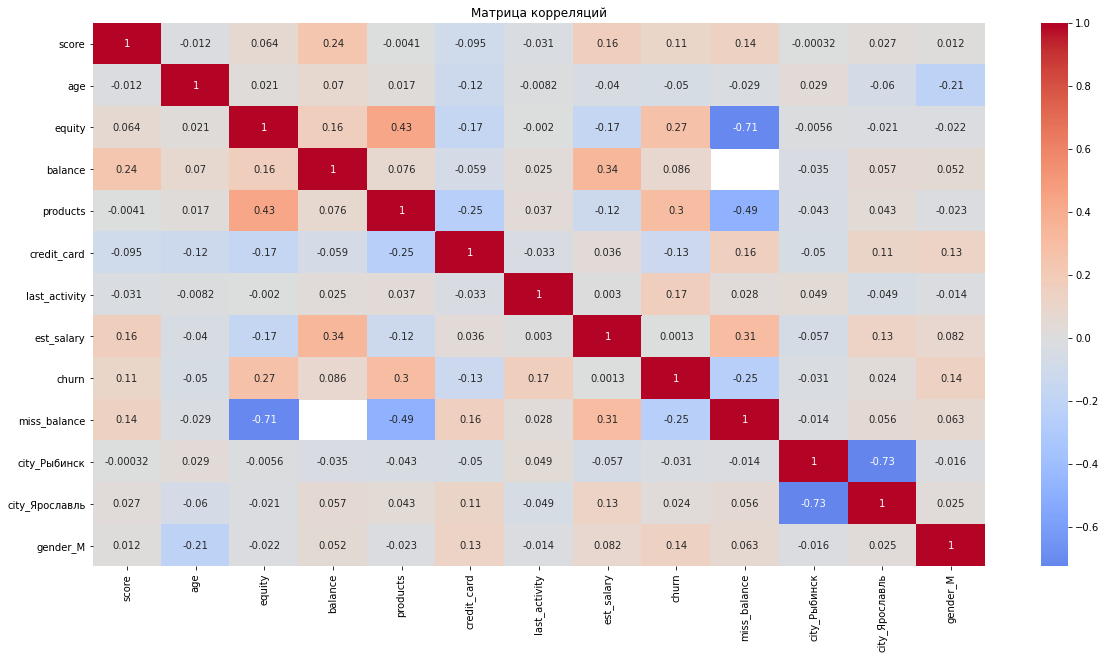

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(pd.get_dummies(corr_balance, columns=['city', 'gender'], drop_first= True).corr(), cmap='coolwarm', annot=True, center=0)
plt.title("Матрица корреляций")
plt.show()

Из таблицы видно довольно значительную зависимость между пераметром "miss_balance" и значениями "количества баллов собственности" (коэффициент корреляции -0.71), также, есть значительная зависимость от значений "количество продуктов, которыми пользуется клиент" (коэффициент корреляции -0.49). Таким образом, пропуски в столбце "баланс на счете" можно отнести к типу MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

Проверим таким же образом пропуски из столбца "возраст":

In [13]:
corr_age = data.copy()
corr_age['miss_age'] = corr_age['age'].isnull().astype(int)
corr_age.drop('user_id', axis= 1 , inplace= True)

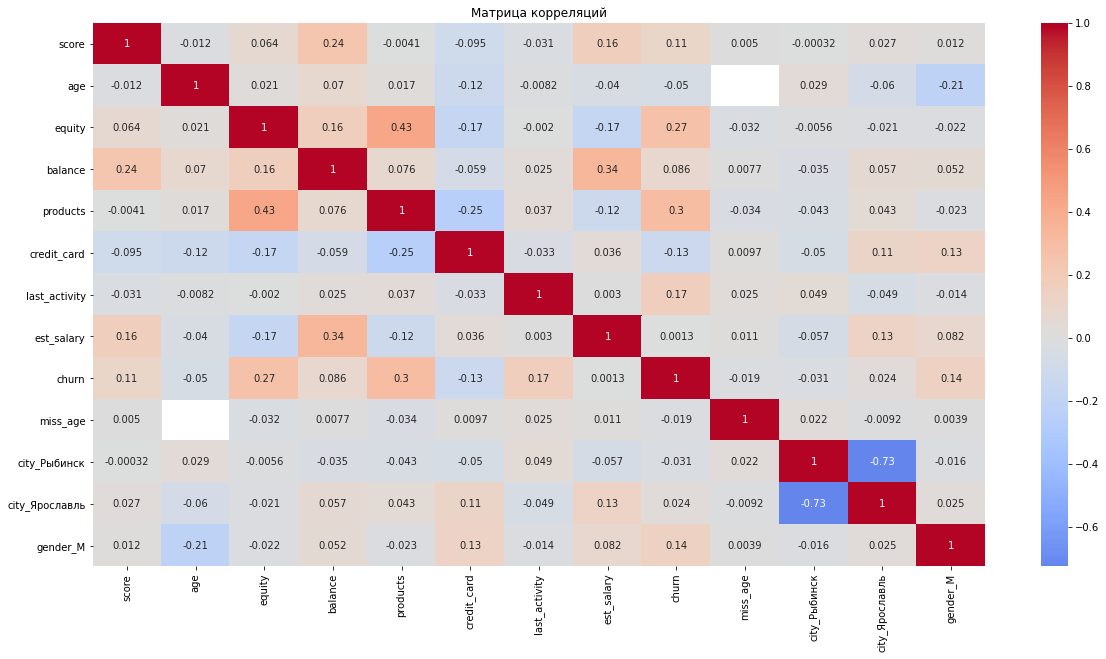

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(pd.get_dummies(corr_age, columns=['city', 'gender'], drop_first= True).corr(), cmap='coolwarm', annot=True, center=0)
plt.title("Матрица корреляций")
plt.show()

Из таблицы видно, что связь между пропущенными значениями в столбце "возраст" и остальными признаками таблицы очень слабая. Можно отнести их к типу MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать, к тому же процент пропусков в данном столбце мал и составляет всего 0.26 %.

In [15]:
data = data.dropna(subset=['age'])

Кодирование категориальных неупорядоченных данных необходимо для того, чтобы применять среднее и смотреть корреляции числового признака с категориальным неупорядоченным: 

In [16]:
data['city_2'] = data['city']
data['gender_2'] = data['gender']
data = pd.get_dummies(data, columns=['city_2', 'gender_2'])
data.head()

user_id  score       city gender   age  equity     balance  products  \
0   183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1   146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2   120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3   225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4   157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  est_salary  churn  city_2_Ростов  \
0            0              1    75719.14      1              0   
1            1              0    86621.77      0              0   
2            1              1   107683.34      0              0   
3            0              1   174423.53      1              0   
4            1              0    67353.16      1              0   

   city_2_Рыбинск  city_2_Ярославль  gender_2_Ж  gender_2_М  
0               1                 0           1           0  
1               1                 0           1           0  
2               1                 0           1           0  
3               0                 1           1           0  
4               0                 1           0           1

Обработка дубликатов:

In [17]:
data.duplicated().sum()

0

Явных дубликатов нет.

Проверка неявных дубликатов по столбцу "идентификатор пользователя":

In [18]:
data['user_id'].duplicated().sum()

50

Обнаружено 50 неявных дубликатов по столбцу "идентификатор пользователя". Выведем все дубликаты:

In [19]:
ids = data['user_id']
data[ids.isin(ids[ids.duplicated()])].sort_values(by=['user_id'])

user_id  score       city gender   age  equity      balance  products  \
1893   116540  883.0    Рыбинск      Ж  55.0       1    362756.49         3   
7694   116540  887.0  Ярославль      Ж  38.0       0          NaN         1   
4866   117943  855.0    Рыбинск      Ж  32.0       6   1036832.93         4   
7542   117943  880.0  Ярославль      Ж  40.0       0          NaN         1   
5863   120258  908.0    Рыбинск      Ж  38.0       4   2213581.63         2   
...       ...    ...        ...    ...   ...     ...          ...       ...   
2302   220816  934.0    Рыбинск      Ж  74.0       5   1294285.39         3   
2597   226719  990.0  Ярославль      М  37.0       4  14648692.14         2   
4216   226719  903.0    Рыбинск      Ж  63.0       0          NaN         1   
8205   227795  840.0    Рыбинск      М  34.0       2    350768.03         1   
8497   227795  839.0  Ярославль      М  34.0       2    326593.14         2   

      credit_card  last_activity  est_salary  churn  city_2_Ростов  \
1893            0              1   175920.48      1              0   
7694            0              1   119247.61      0              0   
4866            1              1   107792.71      1              0   
7542            1              0   137718.93      0              0   
5863            0              1   160327.77      1              0   
...           ...            ...         ...    ...            ...   
2302            1              0    95606.80      0              0   
2597            0              0   934412.61      1              0   
4216            1              0   138582.58      0              0   
8205            1              0   102036.14      1              0   
8497            1              0   103314.92      0              0   

      city_2_Рыбинск  city_2_Ярославль  gender_2_Ж  gender_2_М  
1893               1                 0           1           0  
7694               0                 1           1           0  
4866               1                 0           1           0  
7542               0                 1           1           0  
5863               1                 0           1           0  
...              ...               ...         ...         ...  
2302               1                 0           1           0  
2597               0                 1           0           1  
4216               1                 0           1           0  
8205               1                 0           0           1  
8497               0                 1           0           1  

[100 rows x 17 columns]

Изучив таблицу с дубликатами по столбцу "идентификатор пользователя" можно сделать вывод, что не смотря на на то, что идентификаторы совпадают, речь идет о разных людях. В каждом случае это пользователи из Рыбинска и Ярославля, идентификаторы именно из банков этих городов совпадают. Данные дубликаты удалять нельзя.

## Исследовательский анализ

**Общая информация о клиентах банка**

In [20]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

В данных представлены три филиала банка: в Рыбинске, Ярославле и Ростове.

In [21]:
data_city = data.groupby('city')['user_id'].agg('count').reset_index()
data_city.columns = ['city', 'count']
fig = px.pie(data_city, values="count", names="city", title='Соотношение количества клиентов банка по городам')
fig.show()

Больше всего клиентов из Ярославля (58.9%), далее идут клиенты из Рыбинска (26.9%) и Ростова (14.2%).

In [22]:
data_gender = data.groupby('gender')['user_id'].agg('count').reset_index()
data_gender.columns = ['gender', 'count']
fig = px.pie(data_gender, values="count", names="gender", title='Соотношение количества клиентов банка по полу')
fig.show()

Суммарно в трех филиалах банка равное количество мужчин и женщин.

In [23]:
fig = px.histogram(data, x="age", template='plotly_white', nbins = 69)
fig.update_layout(title='Распределение количества клиентов банка по возрасту', xaxis_title='Возраст клиентов банка', yaxis_title='Количество клиентов банка')
fig.add_vline(x=data['age'].mean(), line_color="red", line_dash="dash", name='Средний возраст')
fig.add_vline(x=data['age'].median(), line_color="green", line_dash="dash", name='Медианный возраст')
fig.show()

Больше всего клиентов банка в возрасте от 28 до 46 лет.

In [24]:
data['age'].mean().round(0)

43.0

Средний возраст клиентов банка - 43 года.

In [25]:
fig = px.histogram(data, x="score", template='plotly_white', nbins = 88)
fig.update_layout(title='Распределение количества клиентов банка по баллам кредитного скоринга', xaxis_title='Баллы кредитного скоринга', yaxis_title='Количество клиентов банка')
fig.add_vline(x=data['score'].mean(), line_color="red", line_dash="dash", name='Средний бал кредитного скоринга')
fig.add_vline(x=data['score'].median(), line_color="green", line_dash="dash", name='Медианный бал кредитного скоринга')
fig.show()

Основная часть клиентов банка имеет балл кредитного скоринга от 765 до 929.

In [26]:
data['score'].median()

853.0

Средний балл кредитного скоринга всех клиентов банка - 853.

In [27]:
data_product_type = data.groupby('products')['user_id'].agg('count').reset_index()
data_product_type.columns = ['products', 'count']
fig = px.bar(data_product_type, x='count', y='products', template='plotly_white', orientation = 'h', color='products')
fig.update_layout(title='Распределение количества пользователей банка в зависимости от количества используемых продуктов банка', xaxis_title='Количество пользователей', yaxis_title='Количество продуктов')
fig.update_coloraxes(showscale=False)
fig.show()

In [28]:
data_product_type['percent'] = round((data_product_type['count'] / data_product_type['count'].sum()) * 100, 2)

In [29]:
data_product_type

products  count  percent
0         0      1     0.01
1         1   3323    33.32
2         2   5119    51.32
3         3   1038    10.41
4         4    474     4.75
5         5     19     0.19

Больше половины клиентов банка пользуются двумя продуктами (51.32%), чуть меньше клиентов пользуются одним продуктом (33.32%), далее идут клиенты, котрые пользуются тремя продуктами банка (10.41%), затем клиенты, использующие четыре продукта (4.75%), и меньше всего пользуются пятью продуктами (0.19%).

Значения "0" в "количестве используемых продуктах банка" быть не должно, т.к. есть счет. Удалим это анамальное значение:

In [30]:
data = data[data['products'] > 0]

In [31]:
data_product_type = data.groupby('products')['user_id'].agg('count').reset_index()
data_product_type.columns = ['products', 'count']
fig = px.bar(data_product_type, x='count', y='products', template='plotly_white', orientation = 'h', color='products', text='count')
fig.update_layout(title='Распределение количества пользователей банка в зависимости от количества используемых продуктов банка', xaxis_title='Количество пользователей', yaxis_title='Количество продуктов')
fig.update_coloraxes(showscale=False)
fig.show()

In [32]:
data_credit_type = data.groupby('credit_card')['user_id'].agg('count').reset_index()
data_credit_type.columns = ['credit_card', 'count']
data_credit_type['credit_card'] = data_credit_type['credit_card'].replace(0, 'нет кредитной карты')
data_credit_type['credit_card'] = data_credit_type['credit_card'].replace(1, 'есть кредитная карта')
fig = px.pie(data_credit_type, values="count", names="credit_card", title='Соотношение количества клиентов банка в зависимости от наличия кредитной карты')
fig.show()

Больше, чем у половины клиентов банка (68%) есть кредитная карта, у остальных (32%) кредитной карты нет.

In [33]:
data_activity_type = data.groupby('last_activity')['user_id'].agg('count').reset_index()
data_activity_type.columns = ['last_activity', 'count']
data_activity_type['last_activity'] = data_activity_type['last_activity'].replace(0, 'неактивные')
data_activity_type['last_activity'] = data_activity_type['last_activity'].replace(1, 'активные')
fig = px.pie(data_activity_type, values="count", names="last_activity", title='Соотношение количества активных и неактивных клиентов банка')
fig.show()

В представленных данных 52.3% активных клиентов и 47.7% неактивных клиентов банка.

In [34]:
data_churn_type = data.groupby('churn')['user_id'].agg('count').reset_index()
data_churn_type.columns = ['churn', 'count']
data_churn_type['churn'] = data_churn_type['churn'].replace(0, 'оставшиеся')
data_churn_type['churn'] = data_churn_type['churn'].replace(1, 'ушедшие')
fig = px.pie(data_churn_type, values="count", names="churn", title='Соотношение количества ушедших и оставшихся клиентов банка')
fig.show()

Из банка ушло 18.2% клиентов, осталось- 81.8%.

**Анализ распределения призаков в разрезе оттока**

In [35]:
fig = px.histogram(data, x="score", color="churn", template='plotly_white', histnorm='probability', barmode ='overlay', nbins = 100, opacity=0.6)
fig.update_layout(legend=dict(title="Признак отттока:"), title='Распределение клиентов банка по баллам кредитного скоринга', xaxis_title='Баллы кредитного скоринга', yaxis_title='Плотность распределения')
fig.show()

У ушедших клиентов баллы кредитного скоринга от 725 до 1000, при этом, большинство ушедших клиентов имеют баллы от 820 до 934. У оставшихся клиентов диапазон значений баллов шире от 640 до 1000, но у большинства клиентов былы ниже, чем у ушедших: от 795 до 864 и от 870 до 929. В диапазоне значений от 820 до 934 отток клиентов максимальный.

In [36]:
fig = px.histogram(data, x="age", color="churn", template='plotly_white', histnorm='probability', barmode ='overlay', nbins = 90, opacity=0.6)
fig.update_layout(legend=dict(title="Признак отттока:"), title='Распределение клиентов банка по возрасту', xaxis_title='Возраст клинтов банка', yaxis_title='Плотность распределения')
fig.show()

У оставшихся также диапазон значений возраста клиентов шире, чем у ушедших: от 18 до 86. В основном, среди оставшихся клиенты от 28 до 45 лет. Среди ушедших, клиенты в возрасте от 18 до 69. В основнои, это клиенты в возрасте от 27 до 41. Клиенты, подверженные оттоку в возрасте от 25 до 37 и от 50 до 60.

In [37]:
fig = px.histogram(data, x="balance", color="churn", template='plotly_white', histnorm='probability', barmode ='overlay', nbins = 5000, opacity=0.6)
fig.update_layout(xaxis=dict(range=[0, 5000000]), legend=dict(title="Признак отттока:"), title='Распределение клиентов банка по балансу на счете', xaxis_title='Баланс на счете', yaxis_title='Плотность распределения')
fig.show()

У большинства оставшихся клиентов на счете лежит от 75 тыс.руб. до 675 тыс.руб. У ушедших клиентов, в основном, на счете от 125 тыс.руб. до 675 тыс.руб. Также виден большой разброс значений баланса клиетов. Максимальный отток клиентов наблюдается в диапазоне значений от 725 тыс.руб. на счете.

In [38]:
fig = px.histogram(data, x="est_salary", color="churn", template='plotly_white', histnorm='probability', barmode ='overlay', nbins = 200, opacity=0.6)
fig.update_layout(xaxis=dict(range=[0, 1000000]), legend=dict(title="Признак отттока:"), title='Распределение клиентов банка по оценочному доходу', xaxis_title='Оценочный доход', yaxis_title='Плотность распределения')
fig.show()

Оценочный доход у оставшихся и ушедших клиентов почти совпадает. У оставшихся клиентов он смещен в сторону чуть более низкого дохода, у ушедших клиентов в сотрону чуть более высокого дохода. Оттоку подвержены клиенты с оценочным доходом от 100 тыс.руб.

In [39]:
data_products = data.groupby('city')['churn'].agg('mean').reset_index().round(2)
churn_mean = data_products['churn'].mean()
data_products.columns = ['city', 'churn']
fig = px.bar(data_products, x='city', y='churn', color='city', title='Средние значения оттока клиентов банка в зависимости от города', template='plotly_white', text='churn')
fig.update_layout(xaxis_title='Название города', yaxis_title='Среднее значение оттока', xaxis={'categoryorder':'total descending'}, legend=dict(title="Город:"))
fig.add_hline(y=churn_mean, line_color="black", line_dash="dash")
fig.show()

Жители Ярославля и Ростова наиболее подвержены к оттоку, так как уровень оттока жителей данных городов выше, чем средний уровень по банку.

In [40]:
data_gender = data.groupby('gender')['churn'].agg('mean').reset_index().round(2)
data_gender.columns = ['gender', 'churn']
fig = px.bar(data_gender, x='gender', y='churn', color='gender', title='Средние значения оттока клиентов банка в зависимости от пола', template='plotly_white', text='churn')
fig.update_layout(xaxis_title='Пол', yaxis_title='Среднее значение оттока', xaxis={'categoryorder':'total descending'}, legend=dict(title="Пол:"))
fig.add_hline(y=churn_mean, line_color="black", line_dash="dash")
fig.show()

Наиболее склонны к отттоку мужчины, нежели женщины.

In [41]:
data_equity = data.groupby('equity')['churn'].agg('mean').reset_index().round(2)
data_equity.columns = ['equity', 'churn']
fig = px.bar(data_equity, x='equity', y='churn', title='Средние значения оттока клиентов банка в зависимости от количества баллов собственности', template='plotly_white', text='churn')
fig.update_layout(xaxis_title='Количество баллов собственности', yaxis_title='Среднее значение оттока', xaxis={'categoryorder':'total descending'},)
fig.add_hline(y=churn_mean, line_color="black", line_dash="dash")
fig.update_xaxes(dtick=1)
fig.show()

Наибольший уровень оттока наблюдается у клиентов банка с баллом собственности 9 (0.54), чуть менее склонны к оттоку клиенты с баллом собственности 7 (0.46), далее идут клиенты с баллом собственности 6, 8, 5, 4, 3. Клиенты с баллом собственности 0, 1, 2 менее всего подвержены оттоку.

In [42]:
data_products = data.groupby('products')['churn'].agg('mean').reset_index().round(2)
data_products.columns = ['products', 'churn']
fig = px.bar(data_products, x='products', y='churn', title='Средние значения оттока клиентов банка в зависимости от количества продуктов, которыми пользуется клиент', template='plotly_white', text='churn')
fig.update_layout(xaxis_title='Количество продуктов', yaxis_title='Среднее значение оттока', xaxis={'categoryorder':'total descending'})
fig.add_hline(y=churn_mean, line_color="black", line_dash="dash")
fig.show()

Наиболее поддвержены оттоку клиенты, пользующиеся 4 продуктами (0.63),  5 продуктами (0.42) 3 продуктами (0.29). У клиентов, которые пользуются 2 продуктами банка уровень оттока почти совпадает со средним уровнем отттока по банку (0.19). Меньше всего поддвержены клиенты, использующие 1 продукт банка (0.07).

In [43]:
data_credit = data.groupby('credit_card')['churn'].agg('mean').reset_index().round(2)
data_credit.columns = ['credit_card', 'churn']
data_credit['credit_card'] = data_credit['credit_card'].replace(0, 'нет кредитной карты')
data_credit['credit_card'] = data_credit['credit_card'].replace(1, 'есть кредитная карта')
fig = px.bar(data_credit, x='credit_card', y='churn', color='credit_card', title='Средние значения оттока клиентов банка в зависимости от наличия кредитной карты', template='plotly_white', text='churn')
fig.update_layout(xaxis_title='Наличие кредитной карты', yaxis_title='Среднее значение оттока', xaxis={'categoryorder':'total descending'}, legend=dict(title="Наличие кредитной карты:"))
fig.add_hline(y=churn_mean, line_color="black", line_dash="dash")
fig.show()

Клиенты, не имеющие кредитной карты, больше поддвержены оттоку (0.26), чем клиенты с кредитной картой (0.15).

In [44]:
data_activity = data.groupby('last_activity')['churn'].agg('mean').reset_index().round(2)
data_activity.columns = ['last_activity', 'churn']
data_activity['last_activity'] = data_activity['last_activity'].replace(0, 'неактивные')
data_activity['last_activity'] = data_activity['last_activity'].replace(1, 'активные')
fig = px.bar(data_activity, x='last_activity', y='churn', color='last_activity', title='Средние значения оттока клиентов банка в зависимости от активности клиентов', template='plotly_white', text='churn')
fig.update_layout(xaxis_title='Активность клиентов', yaxis_title='Среднее значение оттока', xaxis={'categoryorder':'total descending'}, legend=dict(title="Активность клиента:"))
fig.add_hline(y=churn_mean, line_color="black", line_dash="dash")
fig.show()

Активные клиенты банка больше подвержены оттоку(0.24), чем неактивные клиенты(0.11).

**Корреляционный анализ**

Главная задача: анализ корреляции всех параметров таблицы с признаком оттока.

In [45]:
data_corr = data.copy()
data_corr.drop('user_id', axis= 1 , inplace= True)

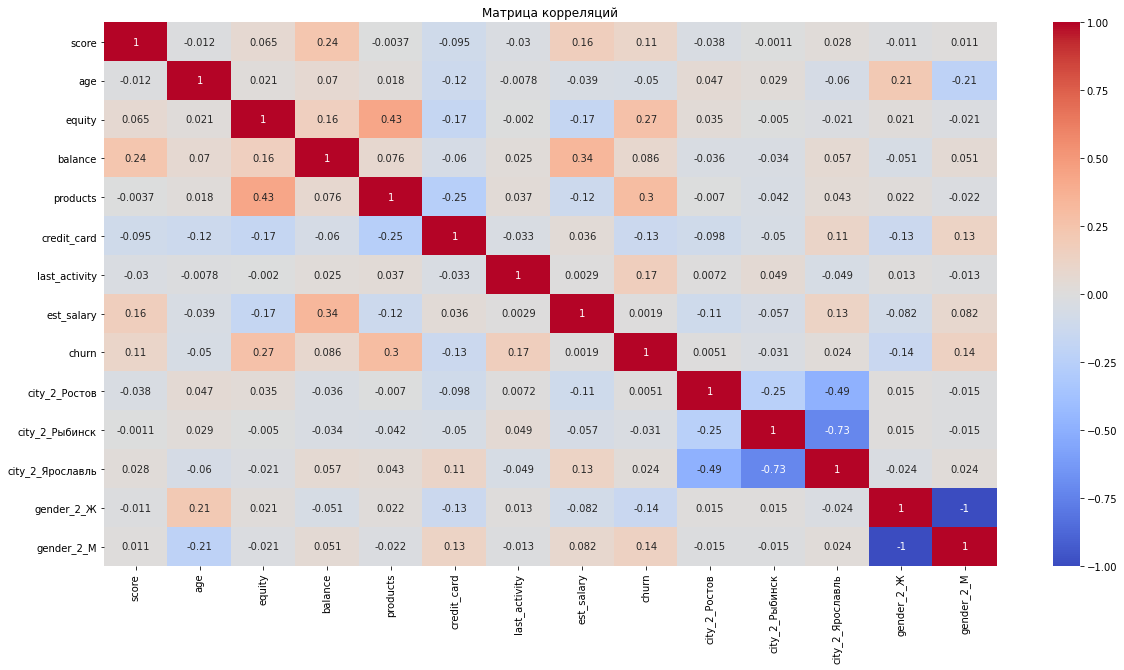

In [46]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_corr.corr(), cmap='coolwarm', annot=True, center=0)
plt.title("Матрица корреляций")
plt.show()

In [47]:
data_corr_churn = data_corr.corr()

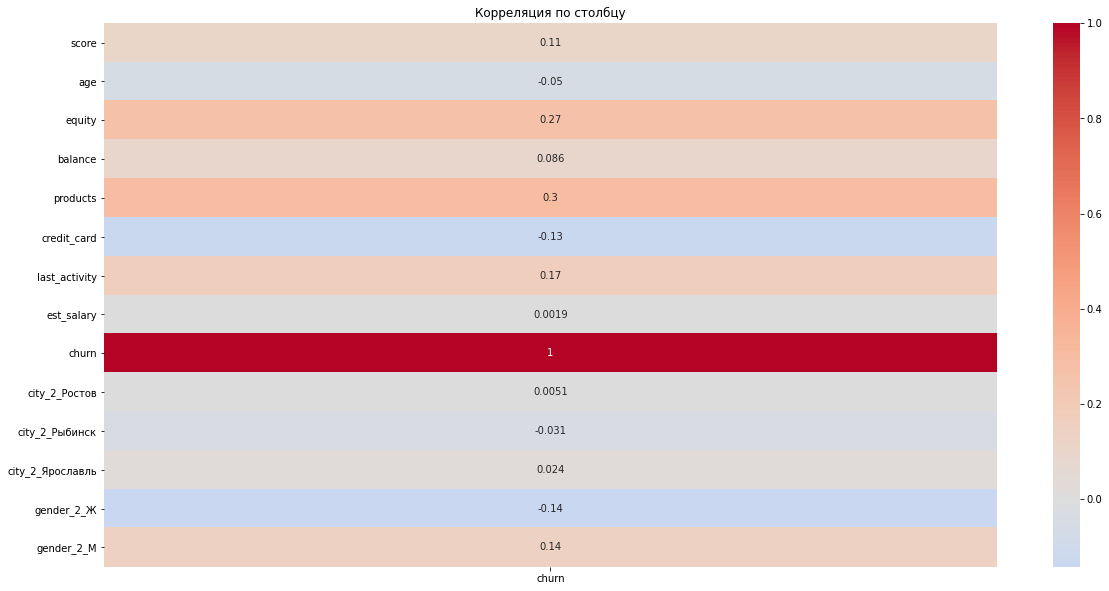

In [48]:
churn_col = pd.DataFrame(data_corr_churn['churn'].fillna(0), columns=['churn'], index=data_corr_churn.index)
plt.figure(figsize=(20, 10))
sns.heatmap(churn_col, cmap='coolwarm', annot=True, center=0)
plt.title("Корреляция по столбцу")
plt.show()

Для интерпретации данных матрицы корреляций воспользуемся шкалой Чеддока. Прокомментируем наличие связи всех парамеиров с признаком оттока:
- баллы кредитного скоринга: слабая связь (0.11);
- возраст: очень слабая зависимость (-0.05);
- количество баллов собственности: слабая связь (0.27);
- баланс на счете: очень слабая зависимость (0.086);
- количество продуктов, которыми пользуется клиент: умеренная связь (0.3);
- наличие кредитной карты: слабая связь (-0.13);
- активность клиента: слабая связь (0.17);
- оценочный доход клиента: очень слабая зависимость (0.0017);
- зависимости между городом расположения филиала и пола между признаком оттока не обнаружено.

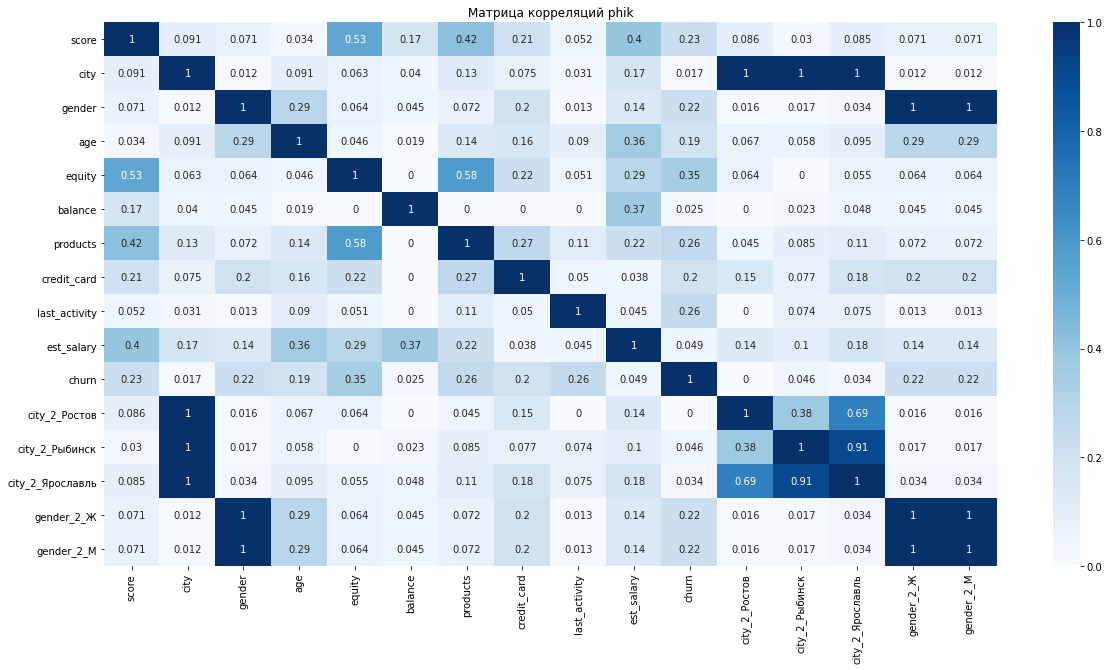

In [49]:
interval_cols = ['score', 'age', 'balance', 'est_salary']
plt.figure(figsize=(20, 10))
sns.heatmap(data_corr.phik_matrix(interval_cols = interval_cols),annot=True, cmap='Blues')
plt.title("Матрица корреляций phik")
plt.show()

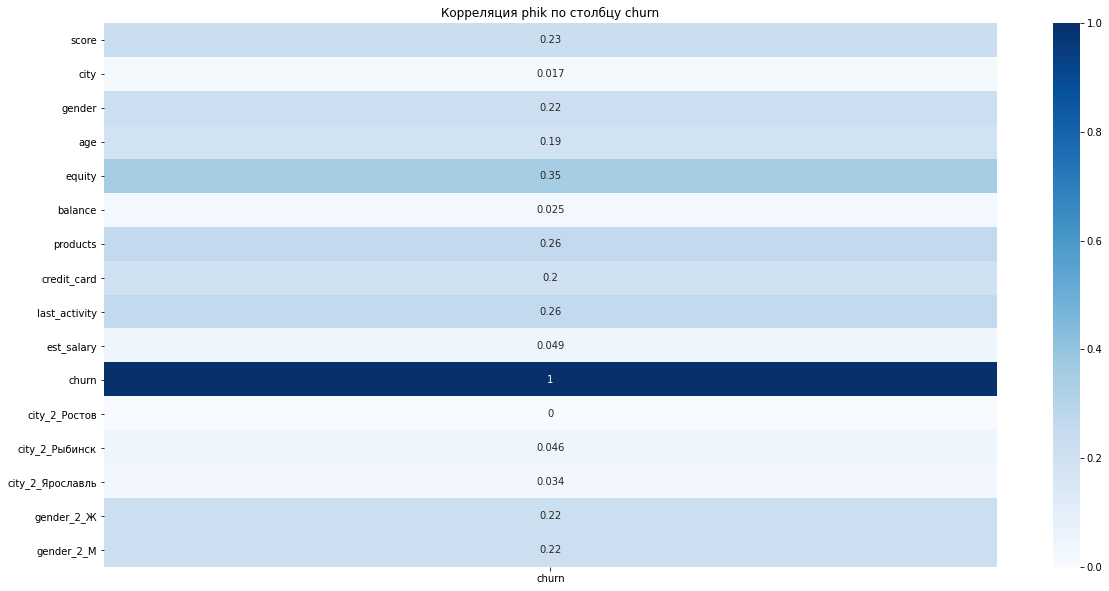

In [50]:
data_phik_churn = data_corr.phik_matrix(interval_cols = interval_cols)
churn_phik_col = pd.DataFrame(data_phik_churn['churn'].fillna(0), columns=['churn'], index=data_phik_churn.index)
plt.figure(figsize=(20, 10))
sns.heatmap(churn_phik_col, cmap='Blues', annot=True)
plt.title("Корреляция phik по столбцу churn")
plt.show()

Сделаем такую же интерпретацию Матрицы корреляций phik:
- баллы кредитного скоринга: слабая связь (0.23);
- возраст: слабая зависимость (0.19);
- количество баллов собственности: умеренная связь (0.35);
- баланс на счете: очень слабая зависимость (0.025);
- количество продуктов, которыми пользуется клиент: умеренная связь (0.44);
- наличие кредитной карты: слабая связь (0.2);
- активность клиента: слабая связь (0.26);
- оценочный доход клиента: очень слабая зависимость (0.049);
- зависимости между городом расположения филиала и признаком оттока не обнаружено;
- обнаружена слабая зависимость пола клиента между признаком оттока (0.22).    

В ходе корреляционного анализа была обнаружена слабая связь почти со всеми параметрами таблицы и призноком оттока. Исключение составили "количество баллов собственности" и "количество продуктов банка, которыми пользуется клиент", здесь наблюдается умеренная связь с признаком оттока.

**Портрет клиента**

Для наглядности выведем данные в содные таблицы, где будут посчитаны средние значения параметров для ушедших и оставшихся клиентов, и их относительная разница в процентах:

In [51]:
data_mean = data.pivot_table(index='churn',
                             aggfunc={'score':"mean",
                                      'age':"mean",
                                      'balance':"mean",
                                      'est_salary':"mean",
                                      'products':"mean",
                                      'equity':"mean"})
data_mean = data_mean.reset_index()
data_mean = data_mean.transpose()
data_mean.columns = ['Оставшиеся', 'Ушедшие']
data_mean['rel_diff, %'] = ((data_mean['Ушедшие'] - data_mean['Оставшиеся']) / data_mean['Оставшиеся']) * 100
data_mean.round(2)

Оставшиеся     Ушедшие  rel_diff, %
churn             0.00        1.00          inf
age              43.02       41.43        -3.70
balance      733031.63  1134458.21        54.76
equity            2.38        3.76        58.24
est_salary   147674.64   148357.48         0.46
products          1.76        2.38        35.16
score           845.40      863.36         2.13

Здесь мы наблюдаем большую разницу в значениях "баланс на счету" между оставшимися и ушедшими клиентами (54.76%), в значениях "количество баллов собственности"(58.22%) и в значениях "колличество продуктов банка, которыми пользуется клиент"(35.08%). В данном случае, это может быть связано с большим разбросом значений. Во всех остальных случаях относительная разница между параметрами оставшихся и ушедших клиентов небольшая: в значениях "возраст" - 3.65%, в значениях "баллы кредитного скоринга" - 2.13%, в значениях "оценочного дохода" - 0.42%.

In [52]:
data_median = data.pivot_table(index='churn',
                             aggfunc={'age':"median",
                                      'balance':"median",
                                      'est_salary':"median",
                                      'products':"median",
                                      'equity':"median"})
data_median = data_median.reset_index()
data_median = data_median.transpose()
data_median.columns = ['Оставшиеся', 'Ушедшие']
data_median

Оставшиеся    Ушедшие
churn             0.00       1.00
age              40.00      39.00
balance      475410.09  783908.90
equity            3.00       4.00
est_salary   118227.60  125408.88
products          2.00       2.00

Медианные значения "баланс на счету" у оставшихся и ушедших клиентов сместился в меньшую сторону, "количество баллов собственности" сместилось в чуть большую сторону, "оценочный доход" сместился в меньшую сторону и "количество продуктов" для оставшихся клиентов смесилось в большую сторону, а для ушедших - в меньшую.

In [53]:
data_mode = data.pivot_table(index='churn',
                             aggfunc={'city':pd.Series.mode,
                                      'gender':pd.Series.mode,
                                      'credit_card':pd.Series.mode,
                                      'last_activity':pd.Series.mode})
data_mode = data_mode.reset_index()
data_mode = data_mode.transpose()
data_mode.columns = ['Оставшиеся', 'Ушедшие']
data_mode

Оставшиеся    Ушедшие
churn                  0          1
city           Ярославль  Ярославль
credit_card            1          1
gender                 Ж          М
last_activity          0          1

Таким образом, портрет оставшихся клиентов:
- возраст: 43 года;
- баланс на счете: 733033 руб.;
- количество баллов собственности: 3;
- оценочный доход: 147675 руб.;
- количество продуктов банка, которыми пользуется клиент: 2;
- баллы кредитного скоринга: 845;
- город: Ярославль;
- кредитная карта: есть;
- пол: женский.

Портрет ушедших клиентов:
- возраст: 42 года;
- баланс на счете: 1.134.485 руб.;
- количество баллов собственности: 4;
- оценочный доход: 148289 руб.;
- количество продуктов банка, которыми пользуется клиент: 2;
- баллы кредитного скоринга: 863;
- город: Ярославль;
- кредитная карта: есть;
- пол: мужской.

## Статистический анализ

**Гипотеза о различии среднего дохода клиентов**

Сперва проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались. Для проверки данной гипотезы выбираем t-тест как более интерпретируемый и понятный для бизнеса.

Чтобы понять, можно ли применять t-тест, нужно проверить три условия:
- выборки не зависят друг от друга;
- выборочные средние выборок нормально распределены;
- дисперсии рассматриваемых выборок равны.

Первое условие в нашем случае выполняется, мы не сравниваем одну выборку до и после какого-либо изменения. Для проверки выполнения второго и третьего условия сделаем срез данных по признаку оттока и выведем размеры исследумых выборок.

Размер выборки для ушедших клиентов банка:

С учетом отброшеных значений перезапишем выборки:

In [54]:
data_est_salary = data.query('est_salary < 300000')

In [55]:
data_gone = data_est_salary.query('churn == 1')
len(data_gone)

1723

Размер выборки для оставшихся клиентов банка:

In [56]:
data_remain = data_est_salary.query('churn == 0')
len(data_remain)

7688

Согласно центральной предельной теореме: если размер выборки составляет хотя бы несколько десятков значений, то выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Поэтому, второе условие, в нашем случае, не может быть препятствием для использования t-теста для проверки гипотезы.

Мы имееи выборки разного размера (1819 и 8155), т.к. размеры выборок отличаются более, чем на 25% всегда необходимо параметру "equal_var" задвать значение False, и тест посчитает дисперсии выборок по отдельности.

Также, необходимо отметить, что t-тест чувствителен к выбросам. Чтобы проверить данные на выбросы выведем "ящик с усами" для оценочного дохода, о котором речь в первой гипотезе:

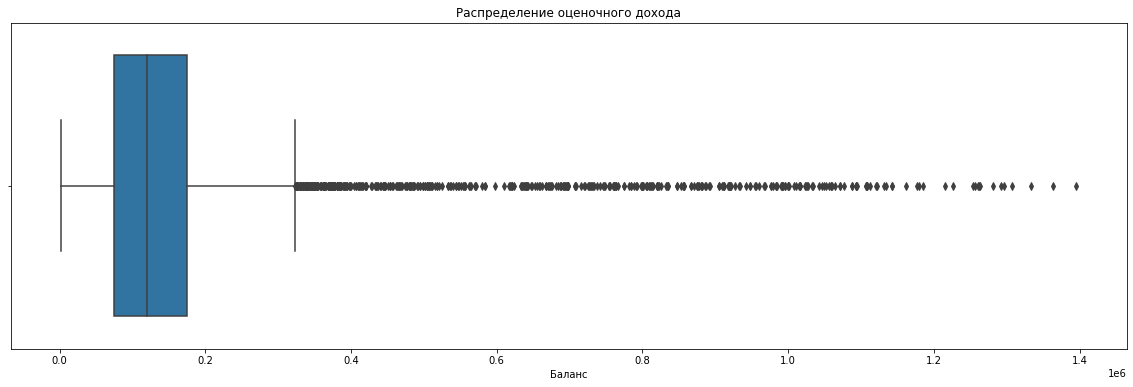

In [57]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='est_salary', data=data)
plt.title('Распределение оценочного дохода')
plt.xlabel('Баланс')
plt.show()

Здесь выбросы идут довольно плотно, но т.к. мы не можем применять t-тест при наличии выбросов, сделаем срез данных и отбросим выбросы по "оценочному доходу клиента":

Процент отброшенных значений составляет 5.64 %. Можем приступить к использованию t-теста

In [58]:
round(((len(data) - len(data_est_salary)) / len(data)) * 100, 2)

5.64

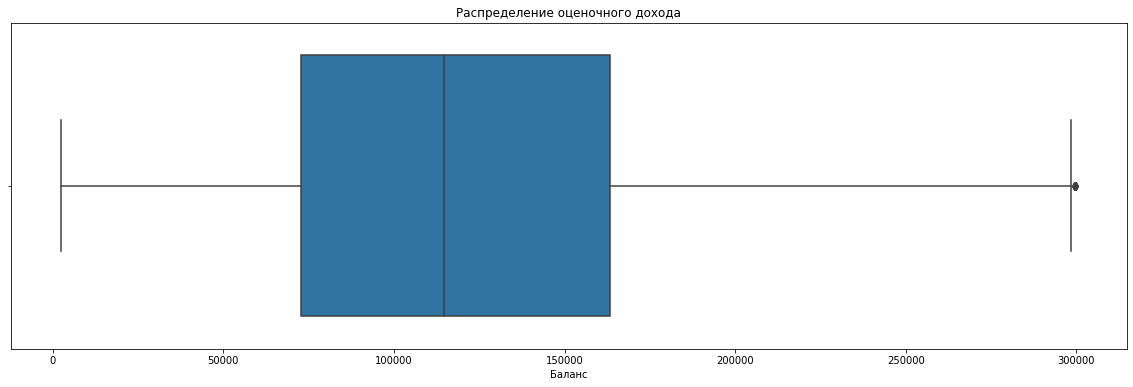

In [59]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='est_salary', data=data_est_salary)
plt.title('Распределение оценочного дохода')
plt.xlabel('Баланс')
plt.show()

Сформулируем гипотезы:
- Н(0): Средние доходы между теми клиентами, которые ушли и теми, которые остались равны;
- Н(1): Средние доходы между теми клиентами, которые ушли и теми, которые остались различны.

In [60]:
alpha = 0.05
results = st.ttest_ind(data_gone['est_salary'], data_remain['est_salary'], equal_var=False)
results.pvalue

6.100664737169493e-05

In [61]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


Различие в среднем доходе ушедших и оставшихся клиентов статистически значимо.

**Гипотеза о среднем балле кредитного скоринга клиентов**

Для проверки гипотезы также воспользуемся t-тестом. Здесь мы также сравниваем независимые выборки, первое условие выполняется. Т.к. размеры выборок те же, что и в первом случае, то второе условие также выполняется. Т.к. размеры выборок также отличаются более, чем на 25%, то зададим параметр: equal_var=False. Проверим значения баллов кредитного скоринга на выбросы:

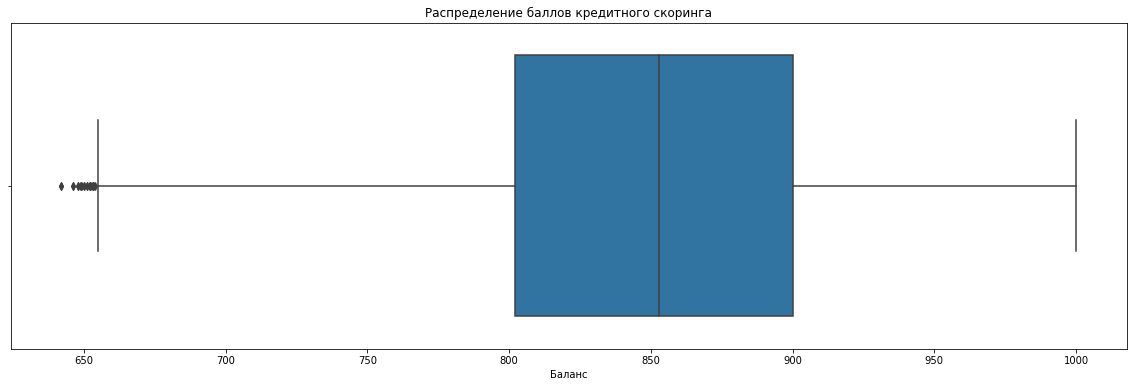

In [62]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='score', data=data)
plt.title('Распределение баллов кредитного скоринга')
plt.xlabel('Баланс')
plt.show()

Со значениями все в порядке, можем применять тест:

Сформулируем следующую гипотезу:
- Н(0): У оставшихся и ушедших клиентов банка средний баллы кредитного скоринга равны;
- Н(1): У оставшихся клинтов банка средний балл кредитного скоринга больше, чем у клиентов, которые ушли.

In [63]:
alpha = 0.05
results = st.ttest_ind(data_remain['score'], data_gone['score'], equal_var=False, alternative='greater')
results.pvalue

1.0

In [64]:
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

Нет оснований отвергнуть нулевую гипотезу


Таким образом, отвергается альтернативная гипотиза: у оставшихся клинтов банка средний балл кредитного скоринга не больше, чем у клиентов, которые ушли.

## Общий вывод по исследовательскому и статистическому анализу

В ходе исследовательского анализа было установлено, что наиболее подвержены оттоку клиеты у которых:
- баллы кредитного скоринга: от 820 до 934;
- возраст: 25 до 37 и от 50 до 60;
- баланс на счете: от 725 тыс.руб.;
- оценочный доход: от 100 тыс.руб.;
- город: Ярославль и Ростов;
- пол: мужской;
- количество продуктов банка, котрыми пользуется клиент: 0, от 2 и больше;
- количество баллов собственности: от 3 и больше;
- наличие кредитной карты: нет;
- активность: активный;

В ходе корреляционного анализа была обнаружена слабая связь почти со всеми параметрами таблицы и призноком оттока. Исключение составили "количество баллов собственности" и "количество продуктов банка, которыми пользуется клиент", здесь наблюдается умеренная связь с признаком оттока.

А также, был сотавлент портрет ушедших клиентов:
- возраст: 42 года;
- баланс на счете: 1.134.485 руб.;
- количество баллов собственности: 4;
- оценочный доход: 148289 руб.;
- количество продуктов банка, которыми пользуется клиент: 2;
- баллы кредитного скоринга: 863;
- город: Ярославль;
- кредитная карта: есть;
- пол: мужской.

В ходе статистического анализа было установленно:
- Различие в среднем доходе ушедших и оставшихся клиентов статистически значимо;
- У оставшихся клинтов банка средний балл кредитного скоринга не больше, чем у клиентов, которые ушли.

На основании всего выше сказанного, обозначим признаки, которые лягут в основу сегментации клиентов банка:
- "возраст";
- "баллы кредитного скоринга";
- "баллы собственности";
- "наличие кредитной карты".

## Сегментация

Для разделения клиентов по сегментам в основу взяли следующие признаки:
- "возраст": от 25 до 37 и от 50 до 60;
- "баллы кредитного скоринга": от 820 до 934;
- "баллы собственности": больше 4, не менее 3,;
- "наличие кредитной карты".

Требования к сегментам:
- сегментов должно быть не меньше трех;
- в каждом сегменте должно быть не менее 500 клиентов;
- показатель оттока в сегменте должен быть выше, чем средний показатель по банку.

Показатель оттока по банку:

In [65]:
data['churn'].mean().round(2)

0.18

**Первый сегмент:**

In [66]:
segment_1 = data.query('(25 <= age <= 37) and (820 < score < 934)  and (equity > 4)')
len(segment_1)

619

In [67]:
segment_1['churn'].mean().round(2)

0.44

- в основу первого сегмента легли показатели: "возраст", "количество баллов собственности" и "количество баллов кредитного скоринга";
- в сегмент вошло 689 клиента;
- показатель оттока в сегменте выше, чем показатель по банку(0.44).

In [68]:
segment1_city = segment_1.groupby('city')['user_id'].agg('count').reset_index()
segment1_city.columns = ['city', 'count']
fig = px.pie(segment1_city, values="count", names="city", title='Соотношение количества клиентов банка по городам сегмент 1')
fig.show()

Основная часть клиентов, попавших в первый сегмент из Ярославля, 62.7%.

In [69]:
segment_1_gender = segment_1.groupby('gender')['user_id'].agg('count').reset_index()
segment_1_gender.columns = ['gender', 'count']
fig = px.pie(segment_1_gender, values="count", names="gender", title='Соотношение количества клиентов по полу в Сегменте 1')
fig.show()

В первом сегменте большую часть составляют мужчины(59%).

Количество продуктов, которыми пользуются клиенты первого сегмента:

In [70]:
segment1_product = segment_1.groupby('products')['user_id'].agg('count').reset_index()
segment1_product.columns = ['products', 'count']
segment1_product['percent'] = round((segment1_product['count'] / segment1_product['count'].sum()) * 100, 2)
segment1_product.sort_values(by='percent', ascending=False)

products  count  percent
1         2    367    59.29
0         1    103    16.64
3         4     90    14.54
2         3     57     9.21
4         5      2     0.32

В основном, клиенты первого сегмента пользуются двумя продуктами.

In [71]:
segment1_credit = segment_1.groupby('credit_card')['user_id'].agg('count').reset_index()
segment1_credit.columns = ['credit_card', 'count']
segment1_credit['credit_card'] = segment1_credit['credit_card'].replace(0, 'нет кредитной карты')
segment1_credit['credit_card'] = segment1_credit['credit_card'].replace(1, 'есть кредитная карта')
fig = px.pie(segment1_credit, values="count", names="credit_card", title='Соотношение количества клиентов банка в зависимости от наличия кредитной карты сегмент 1')
fig.show()

Больше, чем у половины клиентов первого сегмента есть кредитная карта(62.8%).

In [72]:
segment1_activity = segment_1.groupby('last_activity')['user_id'].agg('count').reset_index()
segment1_activity.columns = ['last_activity', 'count']
segment1_activity['last_activity'] = segment1_activity['last_activity'].replace(0, 'неактивные')
segment1_activity['last_activity'] = segment1_activity['last_activity'].replace(1, 'активные')
fig = px.pie(segment1_activity, values="count", names="last_activity", title='Соотношение количества активных и неактивных клиентов банка сегмент 1')
fig.show()

Чуть больше половины клиентов первого сегмента(57.4) являются активными.

**Второй сегмент:**

In [73]:
segment_2 = data.query('(50 <= age <= 60)  and (equity >= 3) and (last_activity == 1)')
len(segment_2)

544

In [74]:
segment_2['churn'].mean().round(2)

0.45

- в основу второго сегмента легли показатели: "возраст", "количество баллов собственности" и "активность";
- в сегмент вошло 544 клиентов;
- показатель оттока в сегменте выше, чем показатель по банку (0.45).

In [75]:
segment2_city = segment_2.groupby('city')['user_id'].agg('count').reset_index()
segment2_city.columns = ['city', 'count']
fig = px.pie(segment2_city, values="count", names="city", title='Соотношение количества клиентов банка по городам сегмент 2')
fig.show()

Чуть больше половины клиентов, попавших в первый сегмент из Ярославля, 52.6%.

In [76]:
segment_2_gender = segment_2.groupby('gender')['user_id'].agg('count').reset_index()
segment_2_gender.columns = ['gender', 'count']
fig = px.pie(segment_2_gender, values="count", names="gender", title='Соотношение количества клиентов по полу в Сегменте 2')
fig.show()

Большая часть клиентов, попавших во второй сегмент- женщины, 64.2%.

Количество продуктов, которыми пользуются клиенты во втором сегменте:

In [77]:
segment2_product = segment_2.groupby('products')['user_id'].agg('count').reset_index()
segment2_product.columns = ['products', 'count']
segment2_product['percent'] = round((segment2_product['count'] / segment2_product['count'].sum()) * 100, 2)
segment2_product.sort_values(by='percent', ascending=False)

products  count  percent
1         2    344    63.24
2         3     76    13.97
0         1     70    12.87
3         4     53     9.74
4         5      1     0.18

Клиенты второго сегмента, в основном, используют 2 продукта.

In [78]:
segment2_credit = segment_2.groupby('credit_card')['user_id'].agg('count').reset_index()
segment2_credit.columns = ['credit_card', 'count']
segment2_credit['credit_card'] = segment2_credit['credit_card'].replace(0, 'нет кредитной карты')
segment2_credit['credit_card'] = segment2_credit['credit_card'].replace(1, 'есть кредитная карта')
fig = px.pie(segment2_credit, values="count", names="credit_card", title='Соотношение количества клиентов банка в зависимости от наличия кредитной карты сегмент 2')
fig.show()

Почти у половины клиентов второго сегмента нет кредитной карты (49.1 %).

**Третий сегмент:**

In [79]:
segment_3 = data.query('(gender == "М") and (last_activity == 1)  and (credit_card == 0)')
len(segment_3)

718

In [80]:
segment_3['churn'].mean().round(2)

0.42

- в основу третьего сегмента легли показатели: "пол", "наличие кредитной карты" и "активность";
- в сегмент вошло 718 клиента;
- показатель оттока в сегменте выше, чем показатель по банку (0.42).

In [81]:
segment3_city = segment_3.groupby('city')['user_id'].agg('count').reset_index()
segment3_city.columns = ['city', 'count']
fig = px.pie(segment3_city, values="count", names="city", title='Соотношение количества клиентов банка по городам сегмент 3')
fig.show()

Большую часть в третьем сегменте составляеют жители Ярославля (46.4%).

Количество продуктов, которыми пользуются клиенты в третьем сегменте:

In [82]:
segment3_product = segment_3.groupby('products')['user_id'].agg('count').reset_index()
segment3_product.columns = ['products', 'count']
segment3_product['percent'] = round((segment3_product['count'] / segment3_product['count'].sum()) * 100, 2)
segment3_product.sort_values(by='percent', ascending=False)

products  count  percent
1         2    410    57.10
0         1    129    17.97
2         3    120    16.71
3         4     59     8.22

В третьем сегменте клиенты в большинстве используют 2 продукта банка.

**Общая информация о полученных сегментах:**

In [83]:
segment_1.describe()

user_id      score         age      equity       balance  \
count     619.000000  619.00000  619.000000  619.000000  6.190000e+02   
mean   169330.486268  877.22294   32.090468    5.218094  8.623148e+05   
std     35929.176502   29.27631    3.517624    0.622602  6.262745e+05   
min     95384.000000  821.00000   25.000000    5.000000  9.001835e+04   
25%    138059.500000  854.00000   29.000000    5.000000  4.664826e+05   
50%    168737.000000  877.00000   32.000000    5.000000  7.076161e+05   
75%    201022.500000  900.00000   35.000000    5.000000  1.082009e+06   
max    229009.000000  933.00000   37.000000    9.000000  5.270925e+06   

         products  credit_card  last_activity    est_salary       churn  \
count  619.000000   619.000000     619.000000  6.190000e+02  619.000000   
mean     2.226171     0.628433       0.573506  1.248323e+05    0.444265   
std      0.905160     0.483614       0.494967  1.100245e+05    0.497286   
min      1.000000     0.000000       0.000000  1.294528e+04    0.000000   
25%      2.000000     0.000000       0.000000  6.969768e+04    0.000000   
50%      2.000000     1.000000       1.000000  1.050033e+05    0.000000   
75%      2.000000     1.000000       1.000000  1.478813e+05    1.000000   
max      5.000000     1.000000       1.000000  1.142436e+06    1.000000   

       city_2_Ростов  city_2_Рыбинск  city_2_Ярославль  gender_2_Ж  gender_2_М  
count     619.000000      619.000000        619.000000  619.000000  619.000000  
mean        0.121163        0.252019          0.626817    0.410339    0.589661  
std         0.326581        0.434523          0.484041    0.492293    0.492293  
min         0.000000        0.000000          0.000000    0.000000    0.000000  
25%         0.000000        0.000000          0.000000    0.000000    0.000000  
50%         0.000000        0.000000          1.000000    0.000000    1.000000  
75%         0.000000        1.000000          1.000000    1.000000    1.000000  
max         1.000000        1.000000          1.000000    1.000000    1.000000

In [84]:
segment_2.describe()

user_id       score         age      equity       balance  \
count     544.000000  544.000000  544.000000  544.000000  5.440000e+02   
mean   173741.665441  853.121324   54.992647    4.235294  1.375696e+06   
std     33938.047088   52.863771    3.247884    0.963307  3.483808e+06   
min     96267.000000  706.000000   50.000000    3.000000  6.300000e+01   
25%    146138.000000  811.750000   52.000000    3.000000  5.293166e+05   
50%    174724.000000  853.000000   55.000000    4.000000  8.446675e+05   
75%    203530.750000  889.000000   58.000000    5.000000  1.354456e+06   
max    229058.000000  997.000000   60.000000    8.000000  6.486621e+07   

         products  credit_card  last_activity    est_salary       churn  \
count  544.000000   544.000000          544.0  5.440000e+02  544.000000   
mean     2.211397     0.490809            1.0  1.274466e+05    0.452206   
std      0.794420     0.500376            0.0  1.308576e+05    0.498169   
min      1.000000     0.000000            1.0  1.593382e+04    0.000000   
25%      2.000000     0.000000            1.0  6.783039e+04    0.000000   
50%      2.000000     0.000000            1.0  9.709517e+04    0.000000   
75%      2.000000     1.000000            1.0  1.443615e+05    1.000000   
max      5.000000     1.000000            1.0  1.185540e+06    1.000000   

       city_2_Ростов  city_2_Рыбинск  city_2_Ярославль  gender_2_Ж  gender_2_М  
count     544.000000      544.000000        544.000000  544.000000  544.000000  
mean        0.158088        0.316176          0.525735    0.555147    0.444853  
std         0.365159        0.465411          0.499797    0.497407    0.497407  
min         0.000000        0.000000          0.000000    0.000000    0.000000  
25%         0.000000        0.000000          0.000000    0.000000    0.000000  
50%         0.000000        0.000000          1.000000    1.000000    0.000000  
75%         0.000000        1.000000          1.000000    1.000000    1.000000  
max         1.000000        1.000000          1.000000    1.000000    1.000000

In [85]:
segment_3.describe()

user_id        score         age      equity       balance  \
count     718.000000   718.000000  718.000000  718.000000  5.960000e+02   
mean   172340.458217   863.250696   42.033426    3.271588  1.312456e+06   
std     34795.576563    57.327278   11.437002    2.005585  2.602464e+06   
min     97131.000000   718.000000   18.000000    0.000000  2.200000e+01   
25%    143780.500000   822.000000   33.000000    2.000000  3.933925e+05   
50%    171333.000000   869.000000   40.000000    4.000000  8.121455e+05   
75%    202225.000000   903.000000   51.000000    5.000000  1.361082e+06   
max    229058.000000  1000.000000   74.000000    9.000000  4.327710e+07   

         products  credit_card  last_activity    est_salary       churn  \
count  718.000000        718.0          718.0  7.180000e+02  718.000000   
mean     2.151811          0.0            1.0  1.627337e+05    0.420613   
std      0.808301          0.0            0.0  1.503989e+05    0.494002   
min      1.000000          0.0            1.0  9.766130e+03    0.000000   
25%      2.000000          0.0            1.0  8.344927e+04    0.000000   
50%      2.000000          0.0            1.0  1.294150e+05    0.000000   
75%      2.000000          0.0            1.0  1.893354e+05    1.000000   
max      4.000000          0.0            1.0  1.395064e+06    1.000000   

       city_2_Ростов  city_2_Рыбинск  city_2_Ярославль  gender_2_Ж  gender_2_М  
count     718.000000      718.000000        718.000000       718.0       718.0  
mean        0.192201        0.344011          0.463788         0.0         1.0  
std         0.394305        0.475376          0.499035         0.0         0.0  
min         0.000000        0.000000          0.000000         0.0         1.0  
25%         0.000000        0.000000          0.000000         0.0         1.0  
50%         0.000000        0.000000          0.000000         0.0         1.0  
75%         0.000000        1.000000          1.000000         0.0         1.0  
max         1.000000        1.000000          1.000000         0.0         1.0

Портрет первого сегмента:
- Количестов клиентов, вошедших в сегмент: 689;
- Показатель оттока: 0.44;
- Средний возраст: 32 года;
- Средний бал кредитного скоринга: 885;
- Средний балл собственности: 5;
- Средний баланс на счете: 1,095,588;
- Количество продуктов, которыми, в среднем, пользуются клиенты: 2;
- Средний оценочный доход: 147027;
- Город: Ярославль;
- Кредитная карта: есть;
- Пол: мужской;
- Активность: ативный.

Портрет второго сегмента:
- Количестов клиентов, вошедших в сегмент: 544;
- Показатель оттока: 0.45;
- Средний возраст: 55 лет;
- Средний бал кредитного скоринга: 853;
- Средний балл собственности: 4;
- Средний баланс на счете: 1.375.696;
- Количество продуктов, которыми, в среднем, пользуются клиенты: 2;
- Средний оценочный доход: 127446;
- Город: Ярославль;
- Кредитная карта: есть;
- Пол: женский;
- Активность: ативный.

Портрет третьего сегмента:
- Количестов клиентов, вошедших в сегмент: 718;
- Показатель оттока: 0.42;
- Средний возраст: 42 лет;
- Средний бал кредитного скоринга: 863;
- Средний балл собственности: 3;
- Средний баланс на счете: 1.312.456;
- Количество продуктов, которыми, в среднем, пользуются клиенты: 2;
- Средний оценочный доход: 162733;
- Город: Ярославль;
- Кредитная карта: нет;
- Пол: мужской;
- Активность: ативный.

## Приоритизация

Отдел маректинга включает только двух работников, у них нет автоматизированных систем, поэтому все мероприятия, рассылки и агитации будут выполнены ручным трудом. Поэтому важно приоритизировать сегменты, чтобы маркетинг знал, на что обратить внимание в первую очередь в случае, если ресурсов маркетинга не хватит на охват всех выделенных сегментов.

В основу приоритизации возьмем показатель оттока клиентов банка, сегменты следует расположить следующим образом в порядке убывания значимости:
- Второй сегмент;
- Первый сегмент;
- Третий сегмент.

## Рекоммендации

**Второй сегмент:**
Большую часть второго сегмента составляют женщины среднего возраста, с высоким показателем баллов собственности. Возможно, данная группа клиентов плохо осведоилена о продуктах и работе с банковским приложением. В таком случае, необходимо информировать данных клиентов, более подробно знакомить с особенностями продуктов, о выгодности условий, посредством консультаций, телефонных звоков, рассылок. Также, можно продумать стратегию, как обучить клиентов данного возраста управлять приложением банка, как находить полезную информацию об услугах (создание обучающих платформ, вебинаров);

**Превый сегмент:** Большую часть первого сегмента составляют мужчины, средний возраст 32 года, с высоким показателем баллов собственности. Для данной группы людей можно разработать экслюзивные инвестиционные предложения. Можно предположить, что данная категория людей уже обзавелась семьей, в таком случае необходимо разработать продукты, ориентированные на детей: "Детские карты", кешбэк на посещения семейных развлекательных центров;

**Третий сегмент:** Большую часть третьего сегмента составляют мужчины, средний возраст 42 года, не имеющие кредитных карт. Для такой группы людей необходимо подготовить предложения по выгодным потребительским кредитам с кэшбеком. Также для такой группы людей будет интересны продукты, разработанные в сотрудничестве с игровыми платформами (с возможностью получать кешбэк и бонусы внутри игр) и онлайн кинотеатрами.

Презентация: https://disk.yandex.ru/i/lIqqD2AKSQdAog